In [ ]:
!pip install scanpy
!pip install scranpy

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scranpy
import scanpy as sc
import anndata
import os
from copy import deepcopy
import matplotlib.image as mpimg

In [ ]:
os.chdir('/content/drive/MyDrive/Single-Cell transcriptomics')
LNv_df = pd.read_csv('LNv_DD.csv', index_col=0)

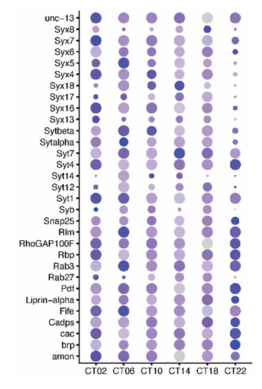

In [ ]:
obj_img = mpimg.imread('wegener.png')
plt.imshow(obj_img)
plt.axis('off')
plt.show()

In [ ]:
annot_cols = ['exp_time', 'date', 'Idents']
obs = LNv_df[annot_cols]
LNv_df = LNv_df.drop(annot_cols, axis='columns')
LNv_ad = sc.AnnData(X=LNv_df,
                      obs=obs,
                      var=LNv_df.columns.to_frame())
LNv_ad
og_ad_LNv = deepcopy(LNv_ad)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


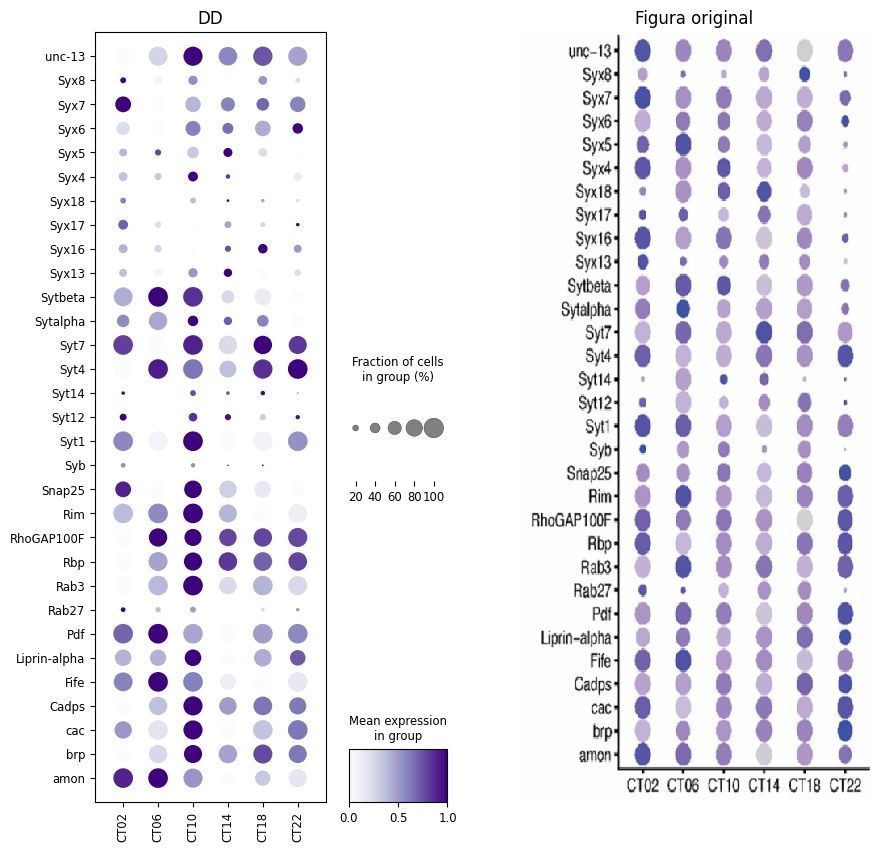

In [ ]:
# hiperparametros
target_sum = 1e6
exclude_highly_expressed = True

# normalizaciones
LNv_ad = deepcopy(og_ad_LNv)
sc.pp.log1p(LNv_ad)
sc.pp.normalize_total(LNv_ad, target_sum=target_sum,
                      exclude_highly_expressed=exclude_highly_expressed,
                      inplace=False)

# ploteo
title = 'DD'
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
dotplot = sc.pl.DotPlot(LNv_ad,
                        var_names=LNv_df.columns[::-1],
                        groupby='exp_time',
                        standard_scale='var',
                        var_group_rotation=0.,
                        edgecolors=None,
                        mean_only_expressed=True,
                        figsize=(5, 7),
                        title=title,
                        cmap='Purples',
                        linewidth=0.,
                        ax=axs[0],)
dotplot.DEFAULT_CATEGORY_WIDTH = 0.7
dotplot.DEFAULT_CATEGORY_HEIGHT = 0.4
dotplot.DEFAULT_PLOT_Y_PADDING = 2
axs[1].imshow(obj_img,interpolation='nearest', aspect='auto')
axs[1].set_title('Figura original')
axs[1].axis('off')
dotplot.swap_axes().show()
plt.show()

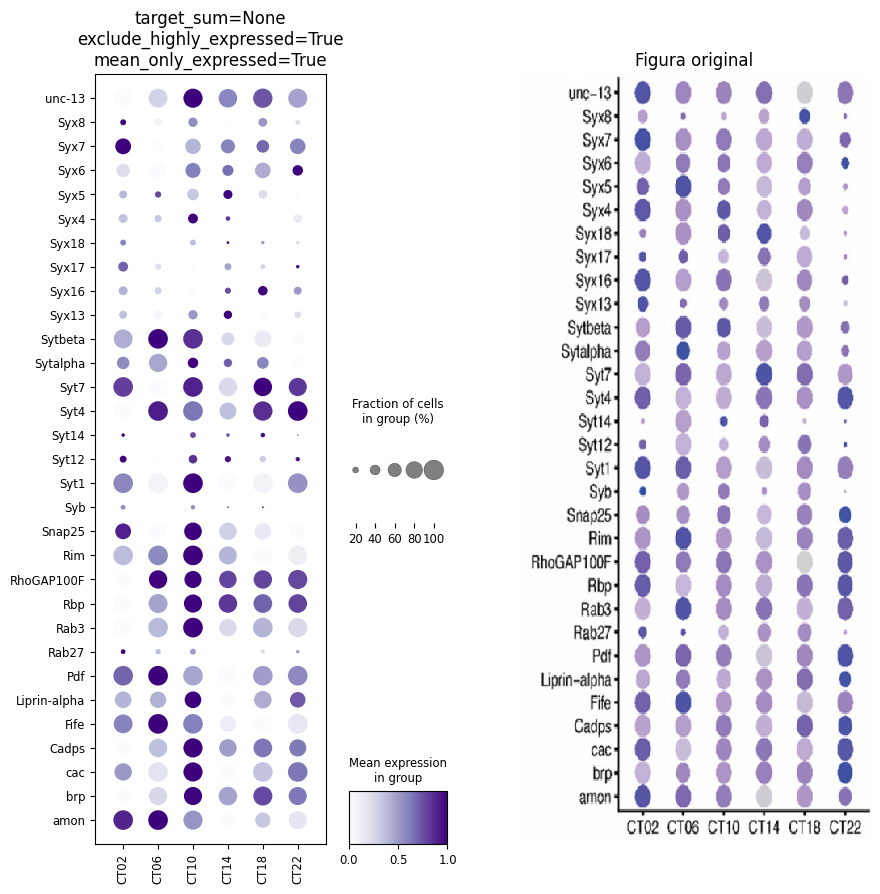

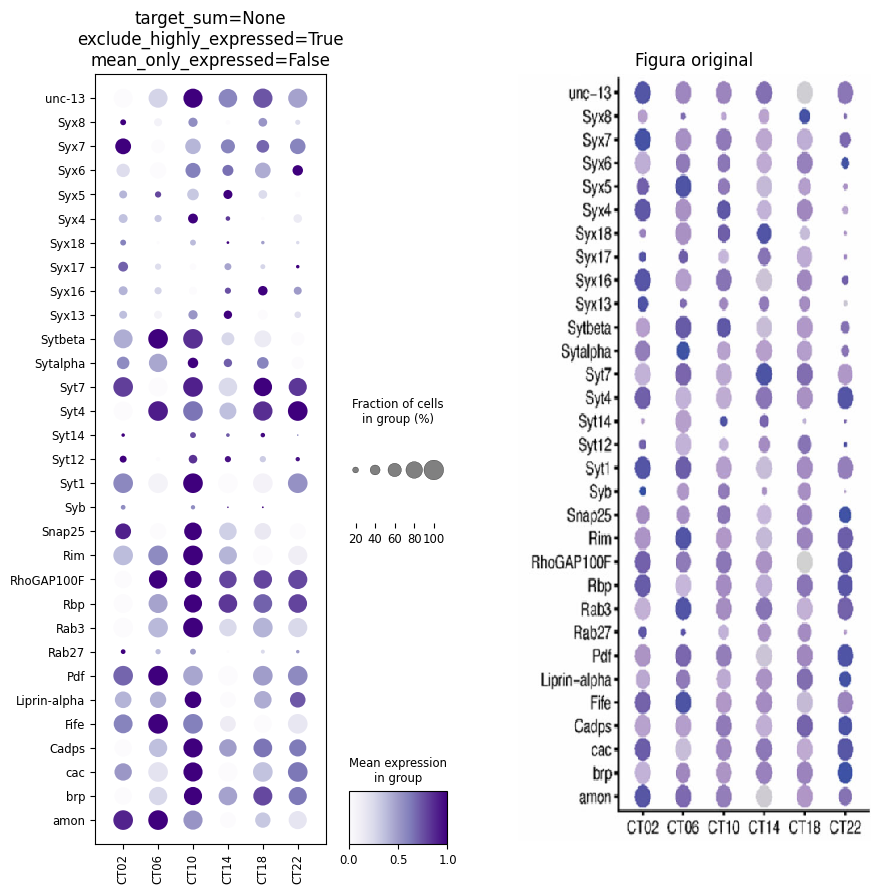

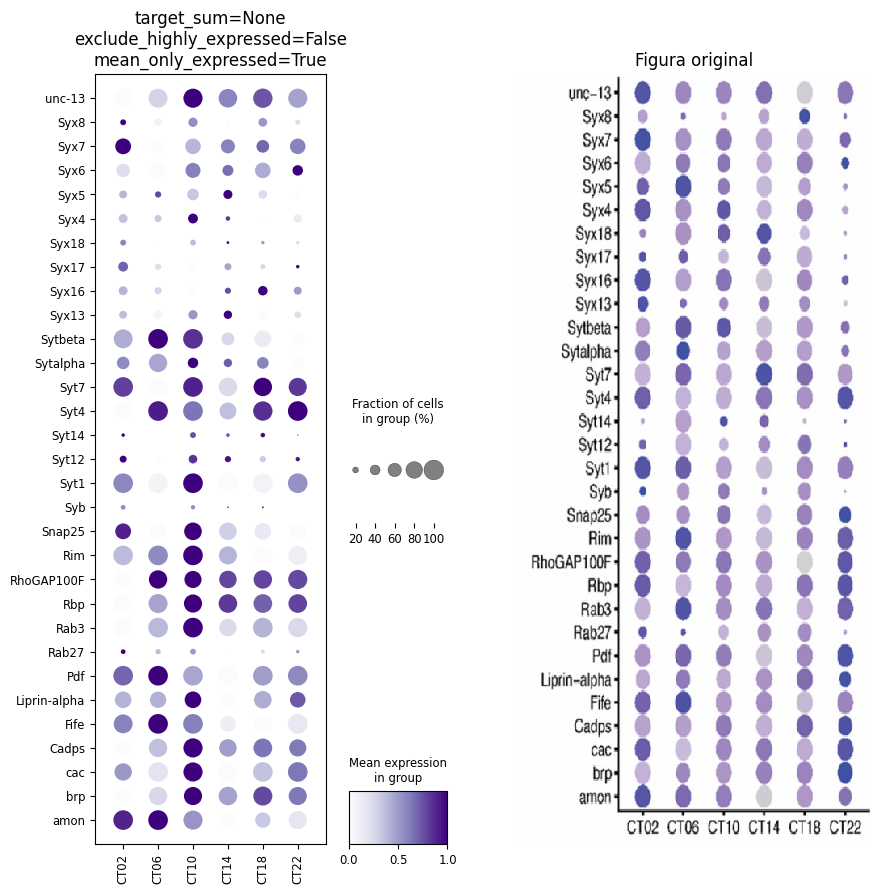

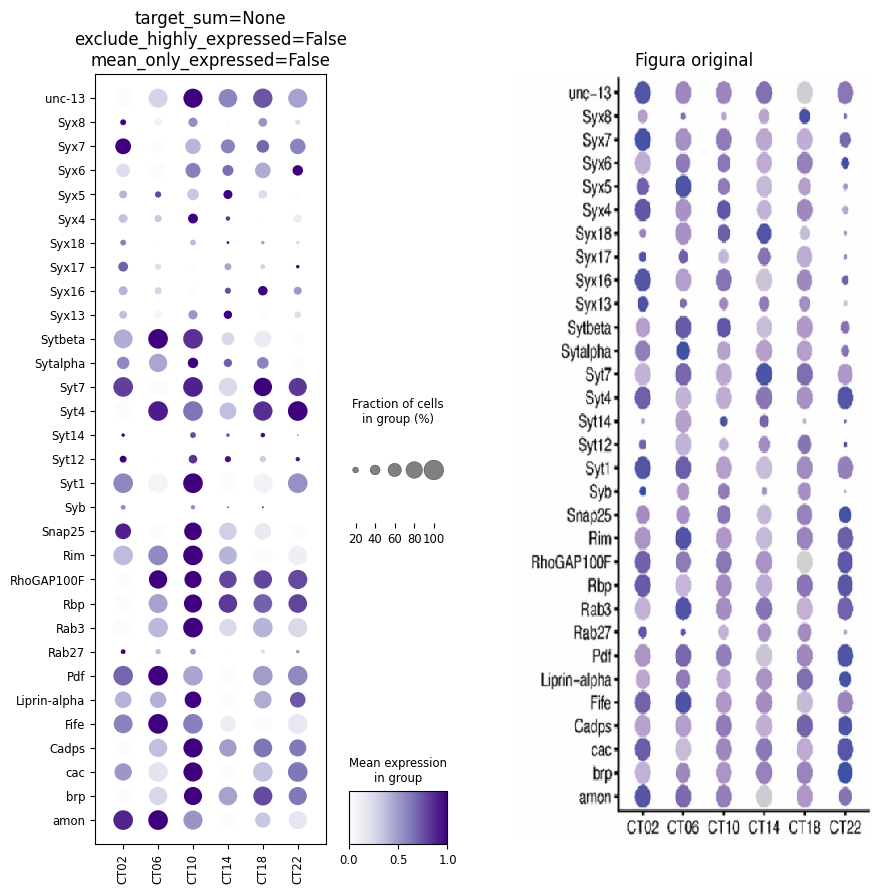

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


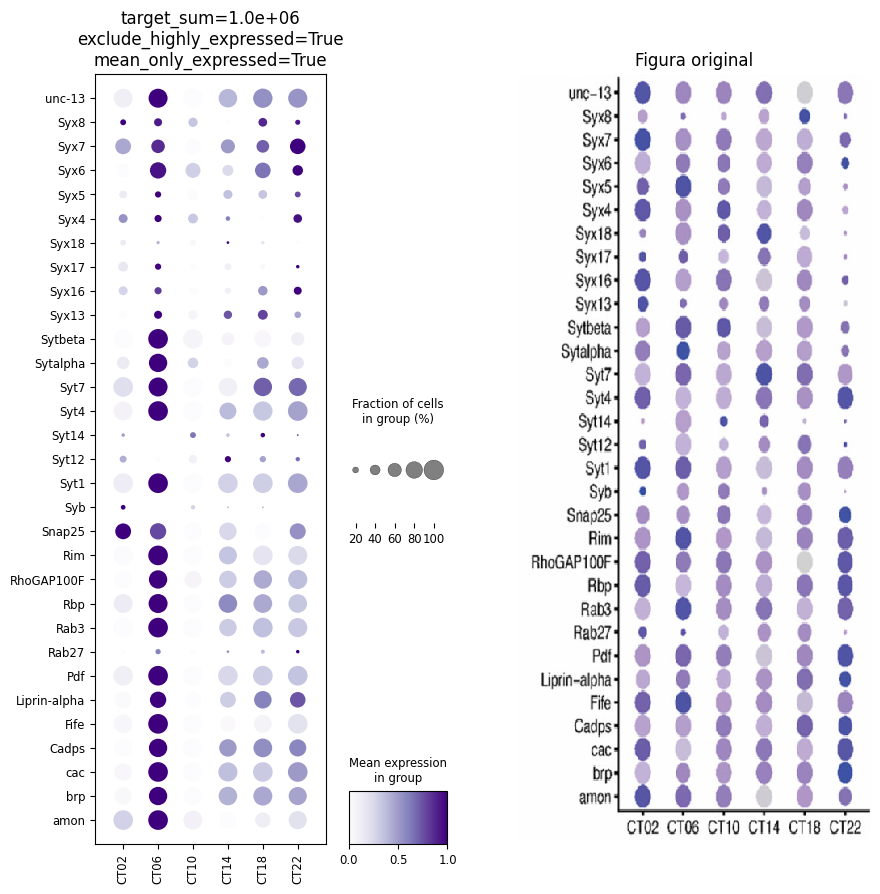

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


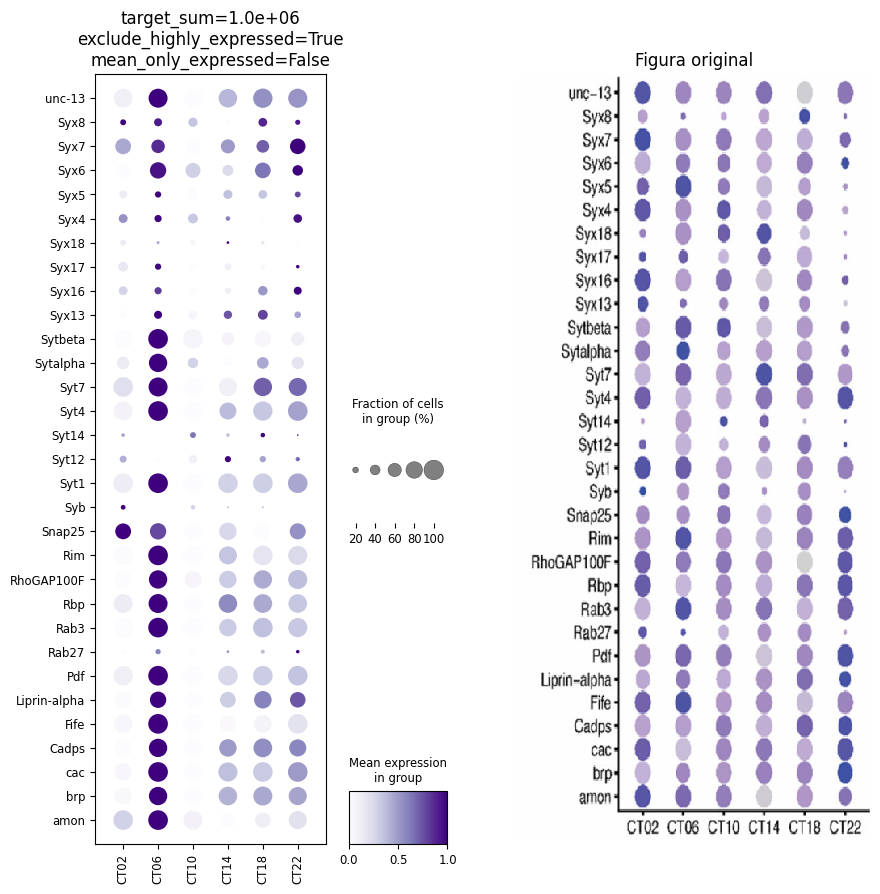

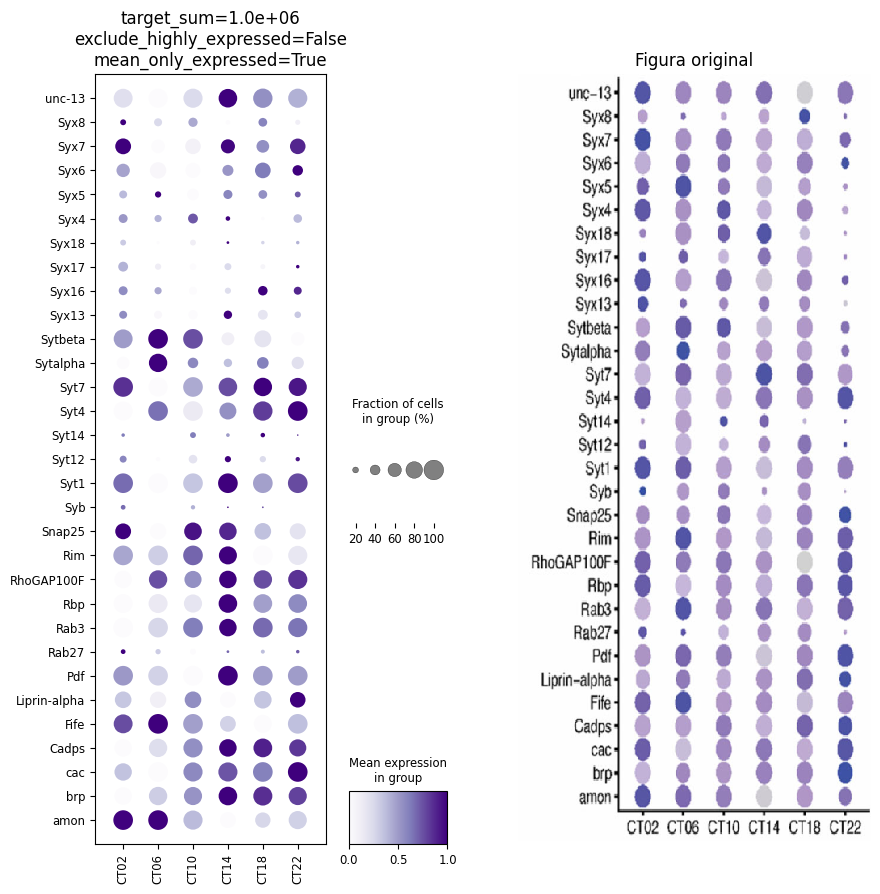

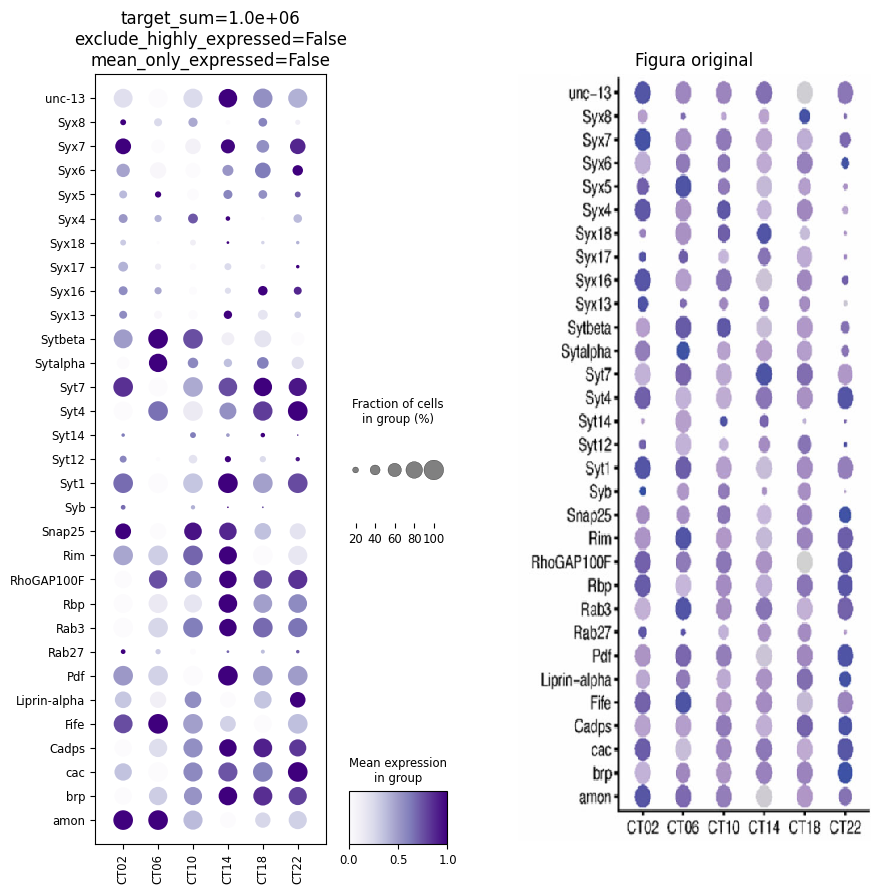

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


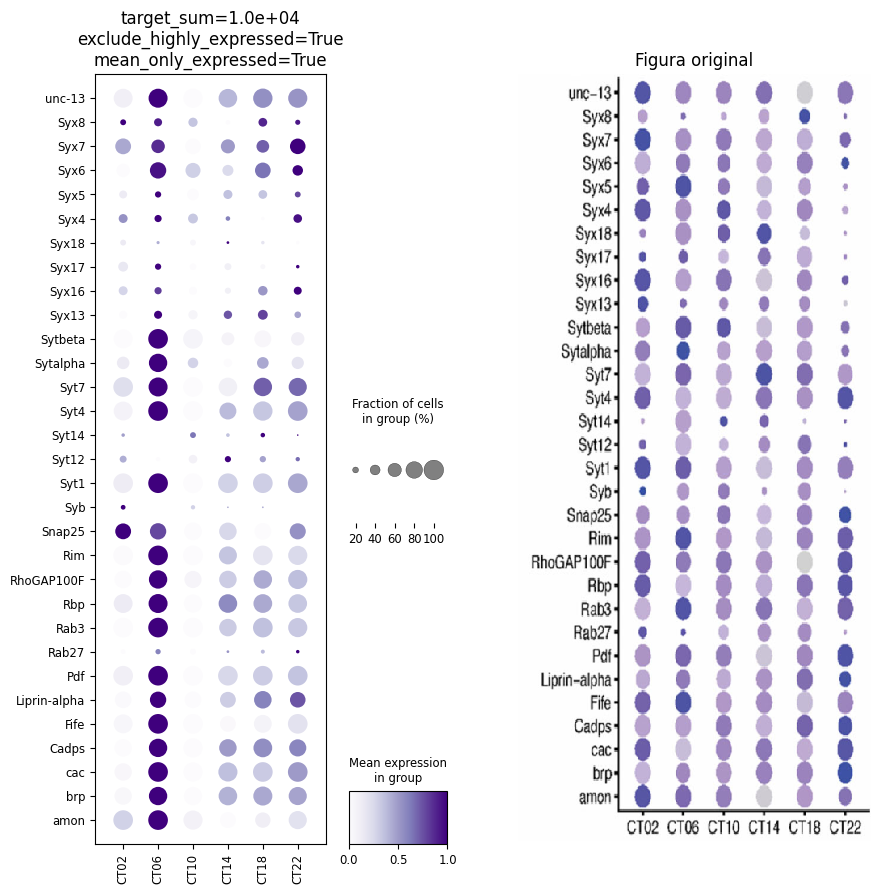

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


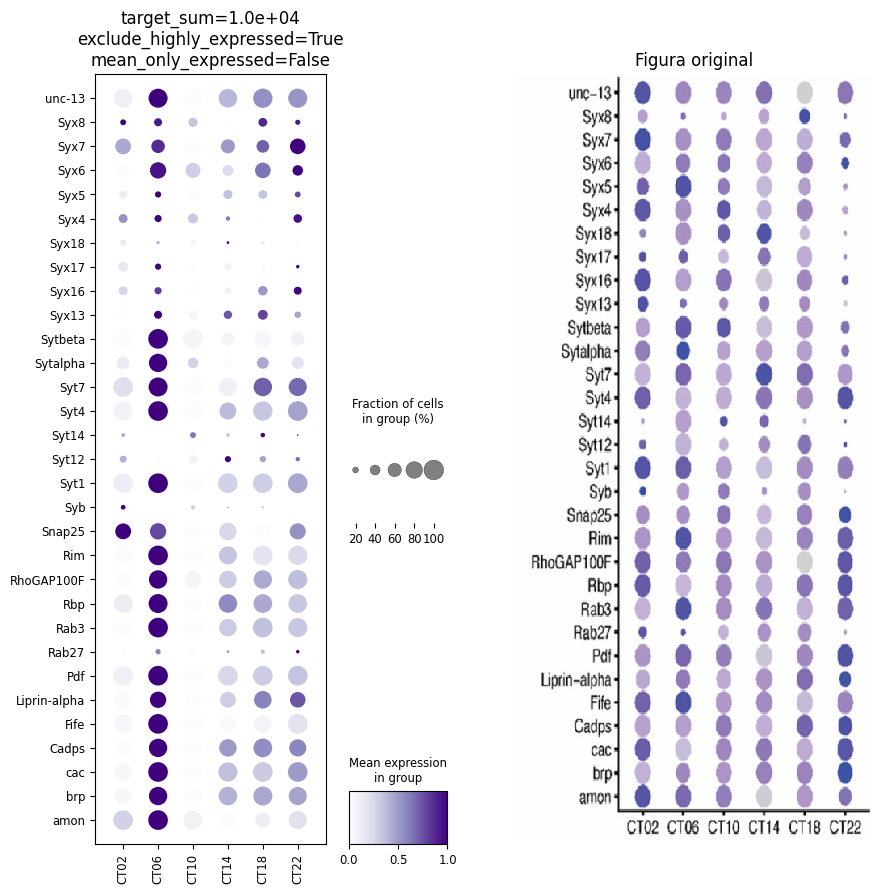

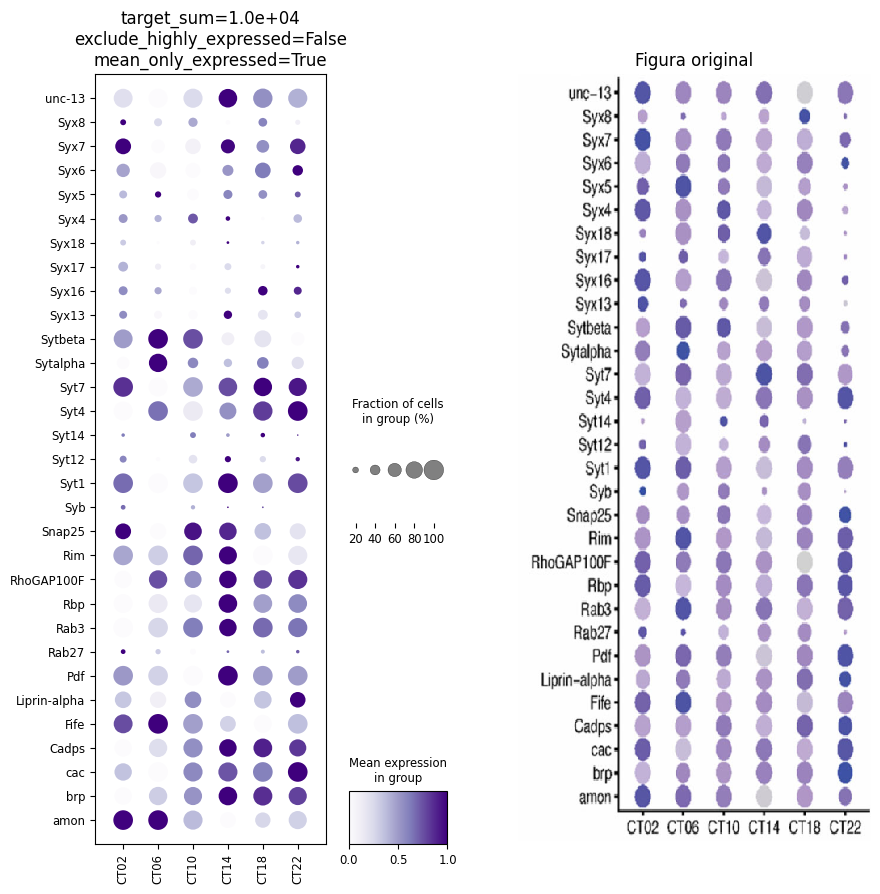

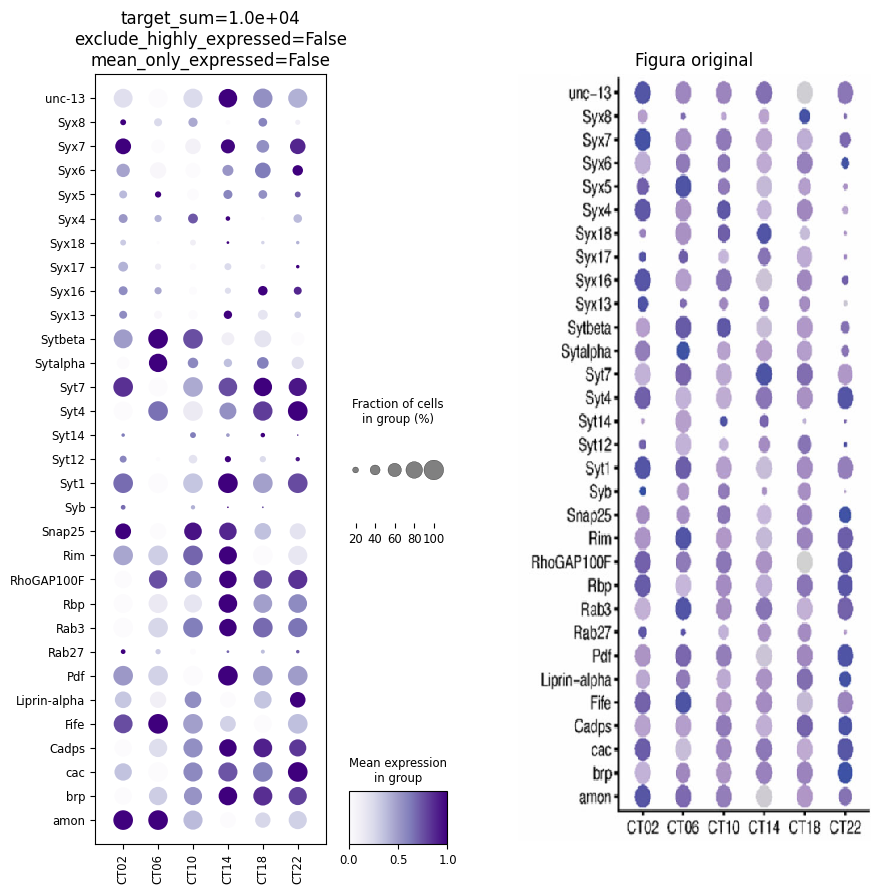

In [ ]:
ts = [None, 1e6, 1e4]
ehes = [True, False]
moxs = [True, False]

for target_sum in ts:
  for exclude_highly_expressed in ehes:
    for mean_only_expressed in moxs:
      # normalizo
      LNv_ad = deepcopy(og_ad_LNv)
      sc.pp.log1p(LNv_ad)
      if target_sum is not None:
        sc.pp.normalize_total(LNv_ad, target_sum=target_sum,
                              exclude_highly_expressed=exclude_highly_expressed,
                              inplace=True)
        sum_title = f"{target_sum=:.1e}"
      else:
        sum_title = f"{target_sum=}"

      # ploteo
      title = '\n'.join([sum_title, f"{exclude_highly_expressed=}", f"{mean_only_expressed=}"])
      fig, axs = plt.subplots(1, 2, figsize=(10, 10))
      dotplot = sc.pl.DotPlot(LNv_ad,
                              var_names=LNv_df.columns[::-1],
                              groupby='exp_time',
                              standard_scale='var',
                              var_group_rotation=0.,
                              edgecolors=None,
                              mean_only_expressed=True,
                              figsize=(5, 7),
                              title=title,
                              cmap='Purples',
                              linewidth=0.,
                              ax=axs[0],)
      dotplot.DEFAULT_CATEGORY_WIDTH = 1.2
      dotplot.DEFAULT_CATEGORY_HEIGHT = 0.4
      dotplot.DEFAULT_PLOT_Y_PADDING = 2
      axs[1].imshow(obj_img,interpolation='nearest', aspect='auto')
      axs[1].set_title('Figura original')
      axs[1].axis('off')
      dotplot.swap_axes().show()
      plt.show()